We have a BernoulliRBM, it will get the input layer and have dot product with weight, then adding bias to the value, finally pass through activation function to get the result a. Size of input layer can be larger than the data classes.

In [1]:
import numpy as np
import math

# sigmoidal function
def activation(x):
    return 1 / (1 + math.exp(-x))

inputs = np.array([1, 2, 3, 4])
weights = np.array([0.2, 0.324, 0.1, .001])
bias = 1.5

a = activation(np.dot(inputs.T, weights) + bias)

print(a)

0.9341341524806636
0.9341341524806636


RBM only allow inter layer connection and don't allow intra-layer(in 1 layer) connection. Also it required multiple forward and backward passes for RBM.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
# scikit-learn RBM
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

url = 'https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/raw/master/Chapter07/mnist_train.csv'
images = np.genfromtxt(url, delimiter=',')
images.shape

(6000, 785)

In [3]:
# get x and y variable
images_X, images_y = images[:, 1:], images[:, 0]

# value are big, but scikit learn RBM will scale within 0 to 1.
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

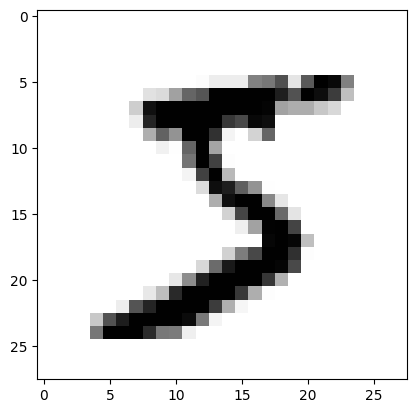

In [4]:
# show image and result
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)
images_y[0]

BernoulliRBM required the input value between 0 to 1 for faster characteristic collection. Therefore, we first scale the value within 0 to 1 and set it to true when it > 0.5, else false.

In [5]:
# scale images_X between 0 to 1
images_X = images_X / 255.

# binarize white or black
images_X = (images_X > 0.5).astype(float)

np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

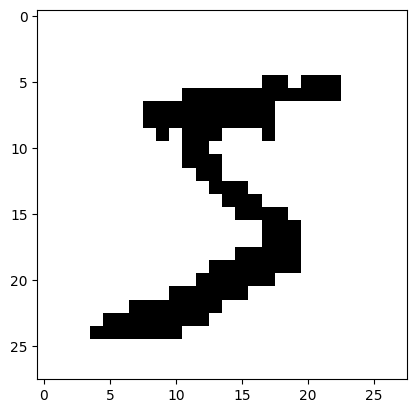

In [6]:
#show the new image
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)
images_y[0]

The fuzziness in the image disappeared. Now we try do PCA in MNIST, first get the 784 pixel characteristics, then do eigenvalue decomposition, get the eigendigit from the data set.

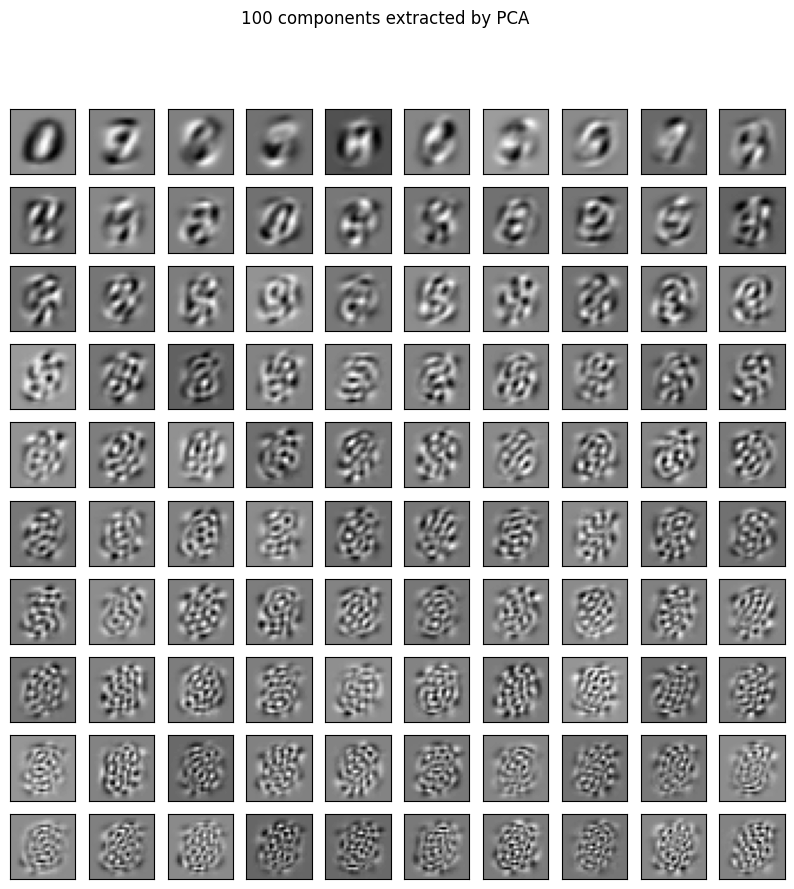

In [7]:
# get the main 100 component and use Matplotlib to show it.
from sklearn.decomposition import PCA

# 100 characteristic number
pca = PCA(n_components=100)
pca.fit(images_X)

# plot the 100 components
plt.figure(figsize=(10, 10))

for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')

plt.show()

We can see the first 10 keep some shape of numbers, others are not visible, like randomly made. This is because PCA and LDA use parameter changing, it cannot get much useful information from complex images.

In [8]:
# first 30 main components catching 64% data, which means the things after 30 are not much helpful.
pca.explained_variance_ratio_[:30].sum()

0.6374141406255012

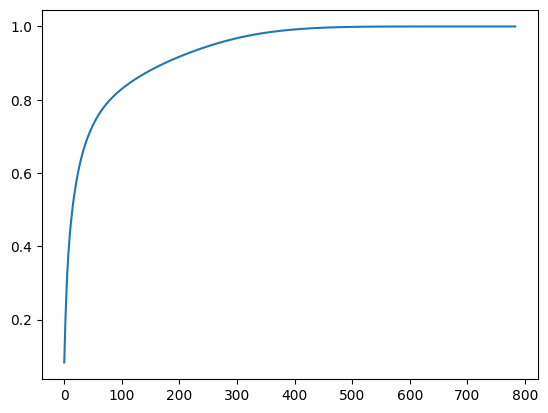

In [9]:
# Scree Plot show how PCA catch variance

# extract al "eigen-digits"
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))

In [10]:
# use the fitted PCA translate the first image object, get 100 new characteristics
pca.transform(images_X[:1])

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181076,
        -1.320495  ,  0.79434685,  0.30551125,  1.22978977, -0.72096752,
         0.08168366, -1.91375605, -2.54647322, -1.62440858,  0.67107334,
         0.15635496,  0.91830926, -0.1898183 ,  1.30140904,  1.57929955,
         0.99051789,  0.11280991,  1.07339722,  0.70139644, -0.35907486,
         0.16658314,  0.99306497, -0.73123786,  0.86970741, -0.1864742 ,
        -0.72487454,  0.11266737,  0.16106528,  0.07320267,  0.11765954,
        -0.7297695 , -0.29695774,  0.17292628,  0.29948634,  2.32396368,
        -0.20427052, -0.85424963,  0.67634366,  0.34915833,  0.33834426,
        -0.42163804, -0.20682245,  0.3937342 , -0.31713289,  0.38757632,
         0.0663829 ,  0.07629924,  0.63010991,  0.799917  , -0.40672754,
         0.03121188, -0.17192838,  0.15095719, -0.52944025, -0.37964046,
        -0.39342575, -0.4964159 ,  0.45490584,  0.29858214,  0.18990837,
         0.71759739,  0.75334904,  0.47347533, -0.2

In [11]:
# same as main component dot with data and get the matrix
np.dot(images_X[:1] - images_X.mean(axis=0), pca.components_.T)

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181076,
        -1.320495  ,  0.79434685,  0.30551125,  1.22978977, -0.72096752,
         0.08168366, -1.91375605, -2.54647322, -1.62440858,  0.67107334,
         0.15635496,  0.91830926, -0.1898183 ,  1.30140904,  1.57929955,
         0.99051789,  0.11280991,  1.07339722,  0.70139644, -0.35907486,
         0.16658314,  0.99306497, -0.73123786,  0.86970741, -0.1864742 ,
        -0.72487454,  0.11266737,  0.16106528,  0.07320267,  0.11765954,
        -0.7297695 , -0.29695774,  0.17292628,  0.29948634,  2.32396368,
        -0.20427052, -0.85424963,  0.67634366,  0.34915833,  0.33834426,
        -0.42163804, -0.20682245,  0.3937342 , -0.31713289,  0.38757632,
         0.0663829 ,  0.07629924,  0.63010991,  0.799917  , -0.40672754,
         0.03121188, -0.17192838,  0.15095719, -0.52944025, -0.37964046,
        -0.39342575, -0.4964159 ,  0.45490584,  0.29858214,  0.18990837,
         0.71759739,  0.75334904,  0.47347533, -0.2

# Get RBM feature from MNIST

In [12]:
# we set verbose to True to check the training process and set random_state=0, it can replay training process, it will randomly
# set weight and bias, then we set n_iter to 20, this is the time for forward+backward propagation.

# n_components same as PCA or LDA, means the characteristic we want to set,it is a integer, can be </=/> original charateristic

rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 1.35s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 1.26s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 1.28s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -120.68, time = 1.40s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -112.61, time = 1.29s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -110.30, time = 1.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -125.24, time = 1.27s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -111.49, time = 1.27s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -111.67, time = 1.29s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -109.16, time = 1.29s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -110.61, time = 1.26s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -109.90, time = 1.41s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -109.63, time = 1.29s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -109.57, time = 1.28s
[BernoulliRBM] 

BernoulliRBM(n_components=100, n_iter=20, random_state=0, verbose=True)

In [13]:
# RBM also has components_
len(rbm.components_)

100

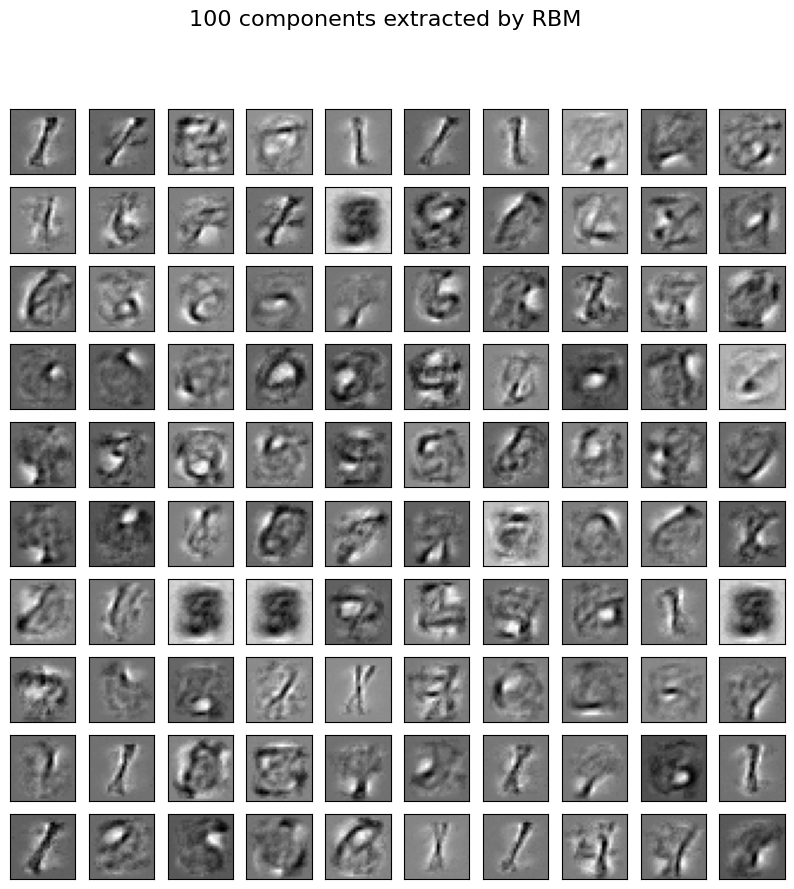

In [14]:
# plot RBM characteristics
plt.figure(figsize=(10, 10))

for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)

plt.show()

RBM feature not distorted as PCA

In [15]:
# seems some features are same
# actually all are different
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [16]:
# we use transform to change data like in PCA, change a number 5.
image_new_features = rbm.transform(images_X[:1]).reshape(100, )
image_new_features

array([8.90435304e-14, 2.47803570e-15, 5.23077956e-10, 2.79886130e-10,
       3.25391100e-17, 1.39956768e-13, 3.88184954e-12, 7.58855689e-10,
       3.05880466e-27, 3.74085212e-10, 3.37828687e-09, 7.87674671e-02,
       4.53459636e-22, 6.74825914e-09, 1.00000000e+00, 2.03694258e-02,
       1.83518713e-14, 6.52541861e-07, 2.33021019e-04, 4.03941386e-09,
       2.58905555e-13, 1.00000000e+00, 6.74917976e-13, 5.67249517e-09,
       8.80173307e-15, 3.05970021e-14, 1.92463284e-06, 2.72739110e-02,
       9.99931640e-01, 9.99995324e-01, 7.42289446e-03, 9.33555548e-07,
       8.42021149e-11, 8.31160084e-13, 1.00000000e+00, 9.00362824e-18,
       3.79096568e-09, 1.56070053e-13, 1.33365167e-02, 1.29204882e-13,
       3.73991404e-14, 9.99999870e-01, 3.36456551e-10, 1.01142420e-09,
       1.50664425e-07, 9.99992566e-01, 4.62478434e-09, 6.31486885e-14,
       1.66234387e-09, 1.00000000e+00, 7.09731544e-23, 6.39308812e-21,
       7.79431514e-16, 1.22267714e-08, 5.86675394e-13, 4.36250225e-11,
      

In [17]:
# not simple matrix multiplication
# use neural network structure (multiple matricies) to change features
np.dot(images_X[:1] - images_X.mean(axis=0), rbm.components_.T)

array([[ -1.94670207,  -9.63681288,  -8.54362542,   9.07194119,
         -9.04814514,  -1.35771951,  -3.44997553, -25.96424505,
        -29.64234729, -11.16016503,   1.1898219 ,  19.7094751 ,
        -24.19739427,  -2.29030175,   8.62129852,   7.73546525,
          1.45558576,   0.97880534,   8.86986944,  -2.73705166,
        -11.39319229,  30.95653354, -16.35947683,   4.00408402,
         -3.09183942,  -4.58455301,   0.24519387,  19.34625187,
         22.81193733,  12.47708131,   2.83574989,  -4.50748416,
        -23.81987565,   6.3455271 ,  40.47170077, -22.98534943,
        -10.09048072,  17.65936735,   3.24171299, -38.63438341,
        -25.40355015,  35.72074351,  -4.11479377, -10.59037   ,
         -2.83857576,  19.21046246,   1.34044066, -10.81469704,
        -11.10894854,  39.68884051, -26.68164188, -18.36704481,
         -6.86322687, -11.0486634 ,  -4.53843875,   3.30486663,
          9.60077363,  -7.38548647,   5.74380732,  10.04529932,
        -11.10221631,   6.0397047 ,   8.

Now we have 100 new features, we will use on the data below.

In [18]:
# get the 20 most important feature from the first image (number 5)
top_features = image_new_features.argsort()[-20:][::-1]
print(top_features)
print(image_new_features[top_features])

[14 69 63 62 56 82 34 21 49 92 83 41 29 45 28 11 27 15 38 30]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999999 0.99999999 0.99999987
 0.99999532 0.99999257 0.99993164 0.07876747 0.02727391 0.02036943
 0.01333652 0.00742289]


There are 9 features totally light up RBM, which means putting 784 pixel as input, the node 14, 69, 63,...,49 are fully light up.

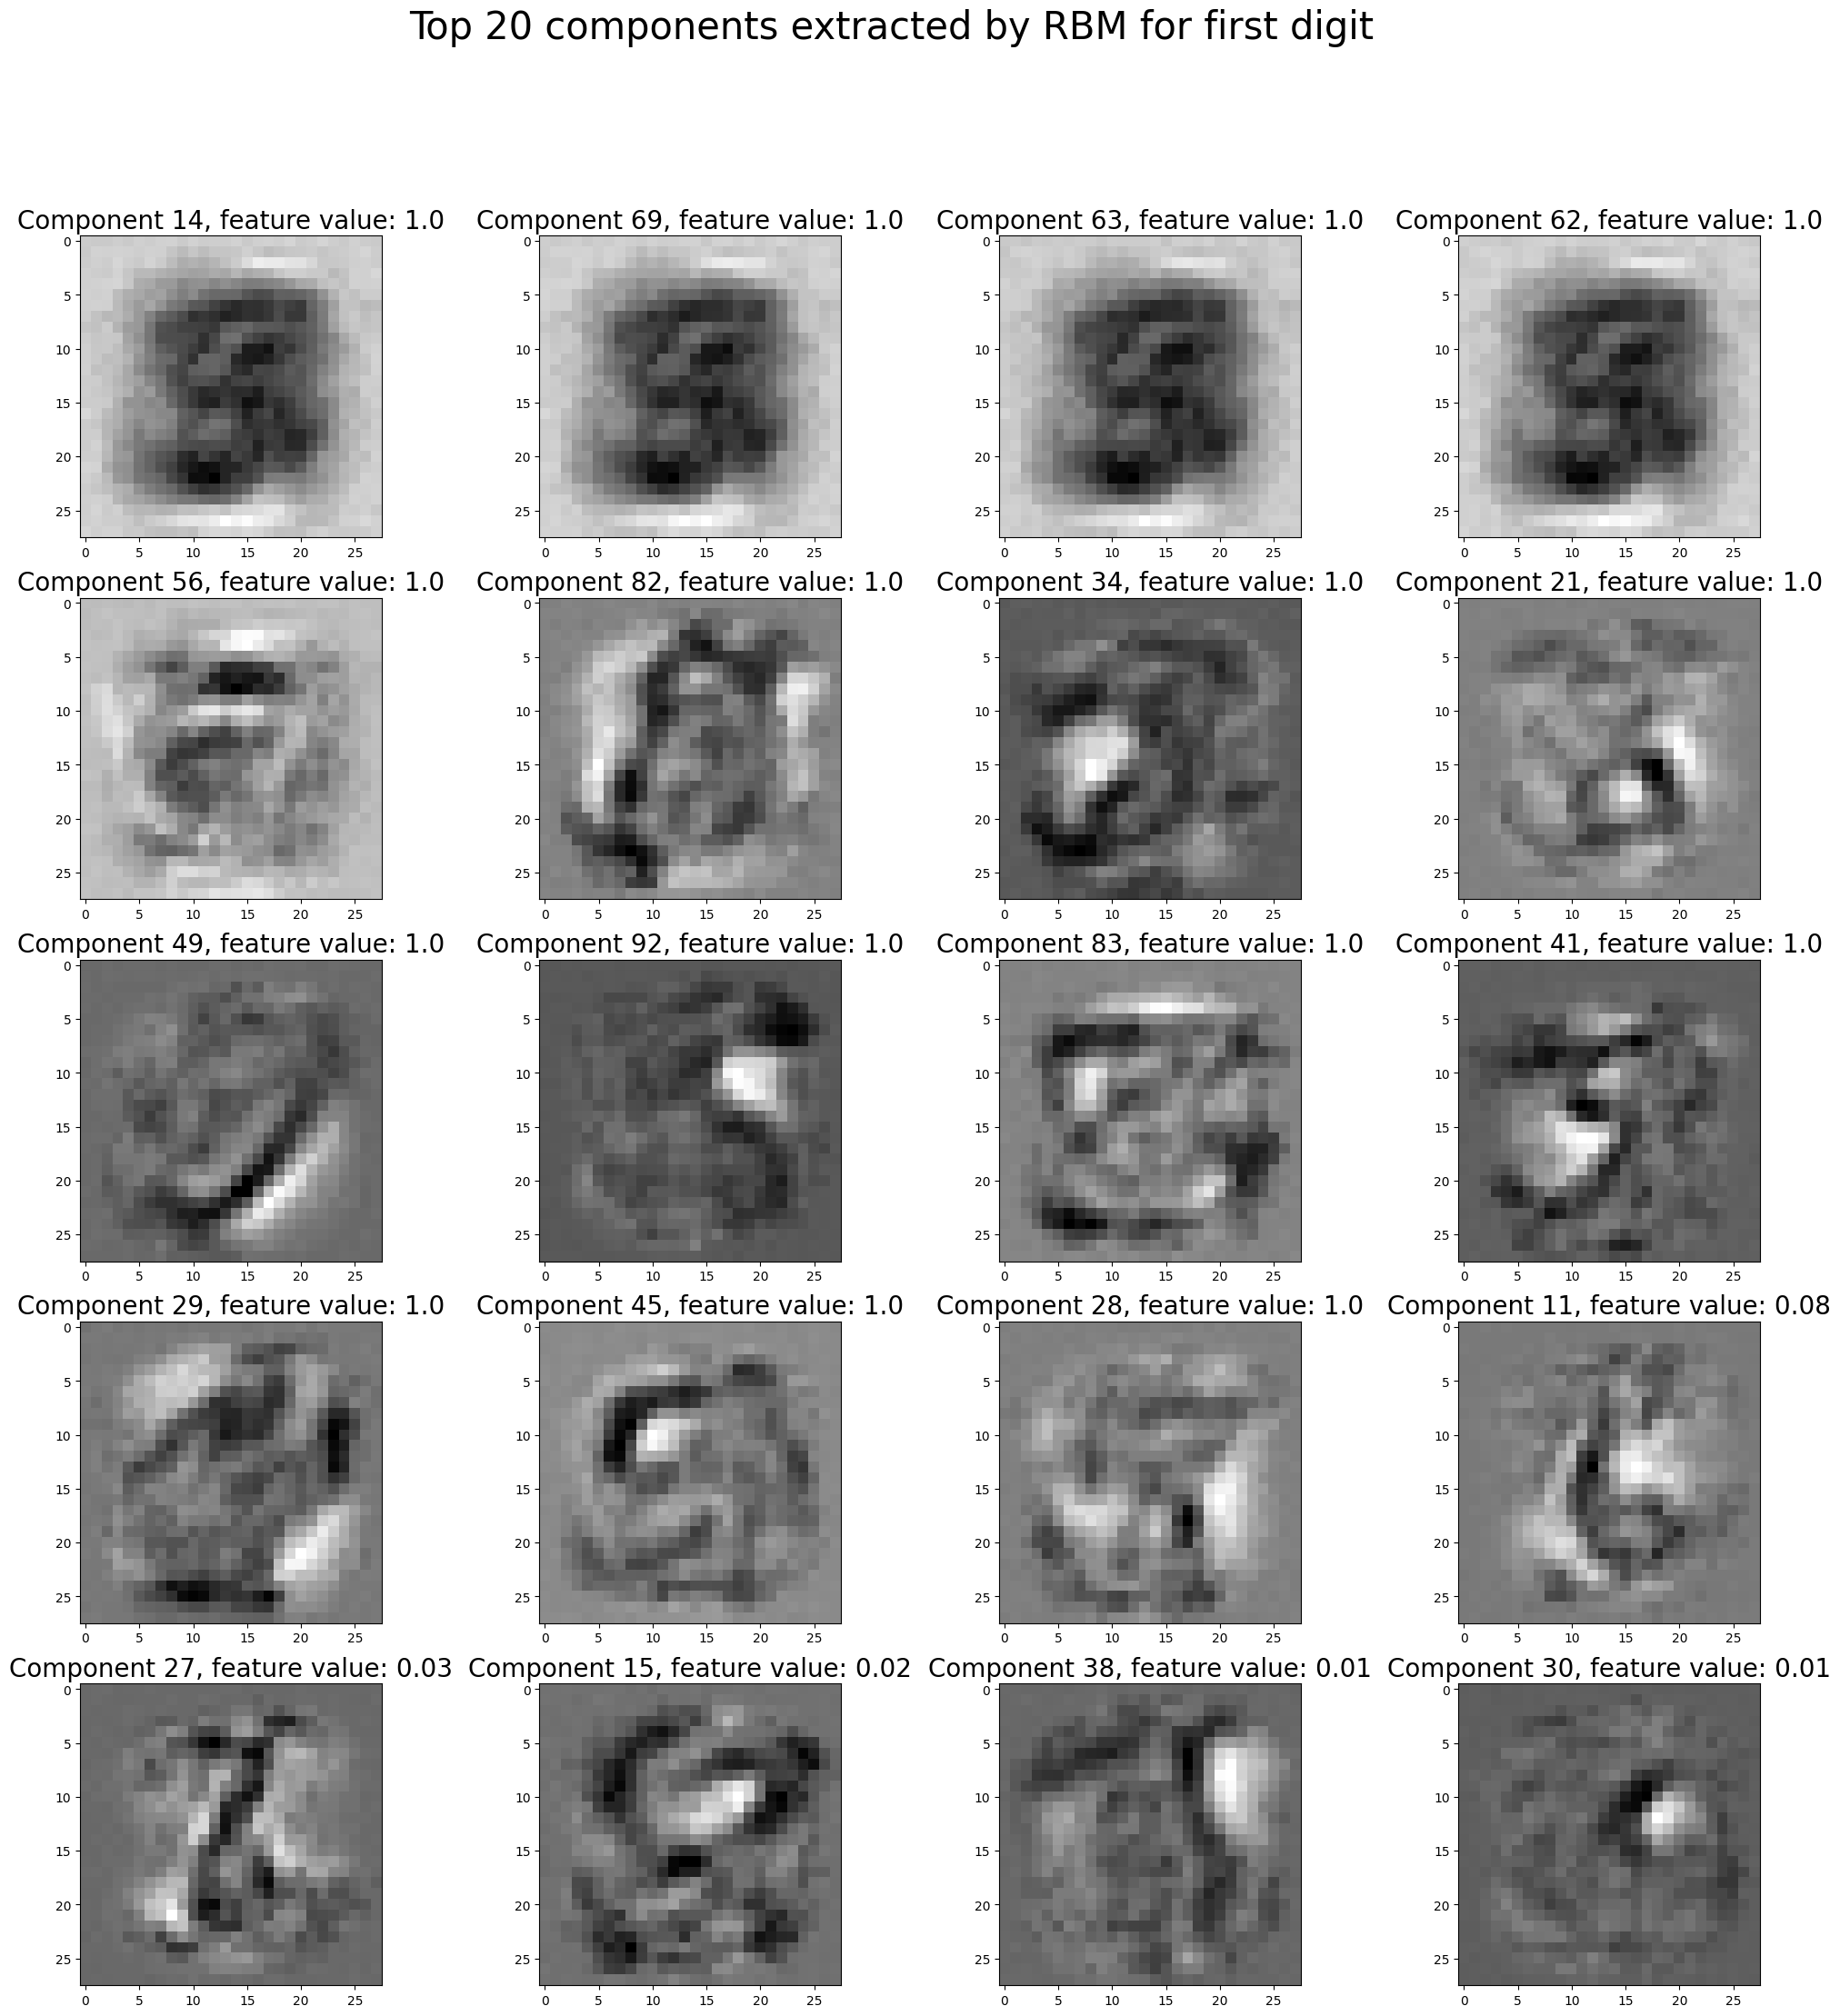

In [19]:
# draw the most representative RBM features(new feature set)
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)
    
plt.show()

There are interesting features, we can see #45 separate the left upper part of a 5, #21 separate the bottom circle, #82 and #34 seems identify 5 directly.

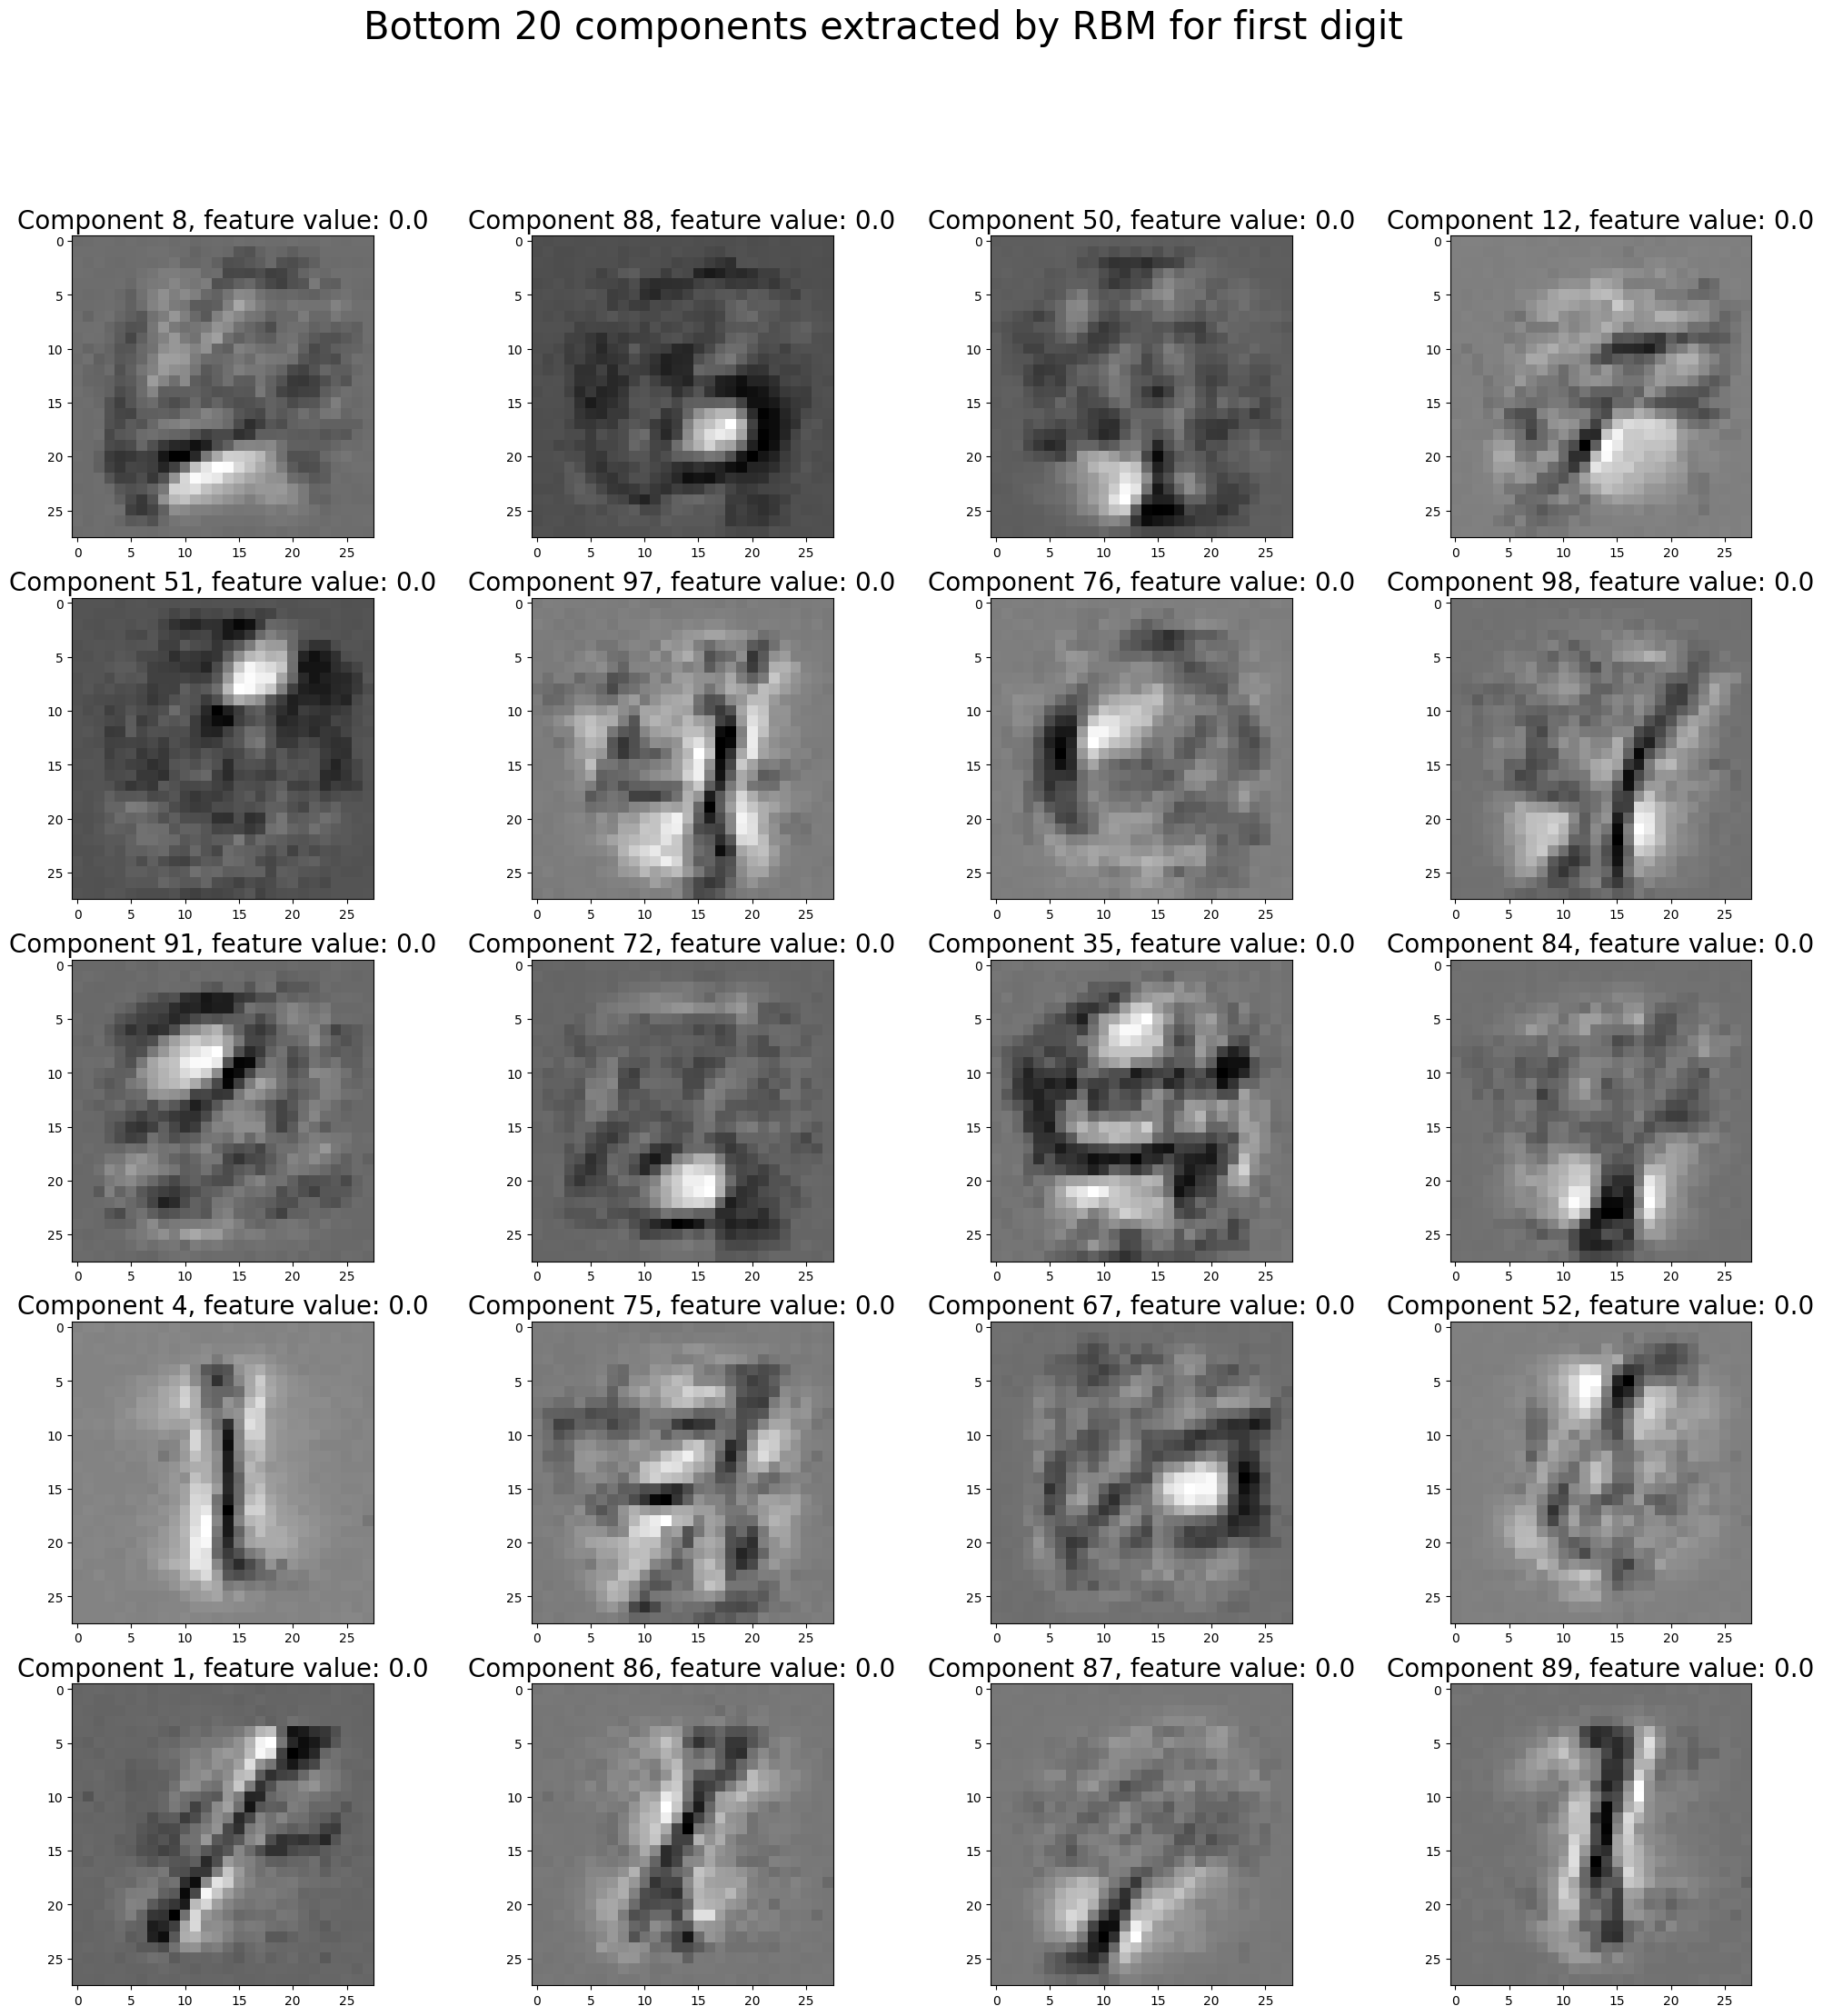

In [20]:
# now we see the worst 20 features
bottom_features = image_new_features.argsort()[:20]
plt.figure(figsize=(25, 25))

for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)
plt.show()

#1, #4, #97 seems like other numbers instead of 5, there are reason why these characteristics are bad.

We use 3 pipelines: Original image, PCA and RBM with logisitic regression to check their efficiency.

In [21]:
# Original
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create logisitc regression
lr = LogisticRegression(max_iter=1000)
params = {'C': [1e-2, 1e-1, 1e0, 1e1, 1e2]}

# create gridSearch
grid = GridSearchCV(lr, params)

# fit data
grid.fit(images_X, images_y)

# get best params
grid.best_params_, grid.best_score_

({'C': 0.1}, 0.898)

In [22]:
# PCA

lr = LogisticRegression(max_iter=1000)
pca = PCA()

# set pipeline params
params = {'clf__C':[1e-1, 1e0, 1e1], 'pca__n_components': [10, 100, 200]}

# create pipeline
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# create gridSearch
grid = GridSearchCV(pipeline, params)

# fitting
grid.fit(images_X, images_y)

# best params
grid.best_params_, grid.best_score_

({'clf__C': 0.1, 'pca__n_components': 200}, 0.8995000000000001)

According to the cumulative plot, first 30 main component explained 64%, therefore 10 components are not enough. After 200, the plot become flat, therefore no need more than 200 components. Also the accuracy just same as original.

# Use linear model on the RBM feature got

- The best PCA can't beat logisitc regression, let's see how RBM is done. How much parameters it needed?

In [23]:
rbm = BernoulliRBM(random_state=0)
params = {'clf__C':[1e-1, 1e0, 1e1], 'rbm__n_components': [100, 200]}
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])
grid = GridSearchCV(pipeline, params)

# fitting and search
grid.fit(images_X, images_y)
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'rbm__n_components': 200}, 0.9221666666666666)

The accuracy increased for 3%, which is much without doing any operation. Components as 200 means that we can try to capture more than 200 features to have better efficiency. In complex mission, such as video, sound or nlp, it is hard to use lineaer transformation like PDA or LDA, but with non parameter algorithm such as RBM can, it is because they have many hidden features.

# Word processing
- we use word embedding to process the words instead just seeing it as a sequentless Bag of words(BOW)
- We have 2 algorithm: GloVe, which use matrix statistics to caluclate and Word2vec, which use deep learning to train.

We use word2Vec here, the input layer have same length as output layer. If we want to learn partly from text, it is useful. We will learn text with ~5000 words, each with 300 features. The difference of this with RBM is it have a output layer, it will guess the neighbor words. If we want to guess "calculus", we hope "math" will like up the most. After that we input one-hot vectors of words, get the hidden layer vector and show as 300 dimension. Because there are many output nodes, the efficiency is low, to increase the speed, we use difference lost function to check the text characteristics.

In [1]:
# we can get word embedding with gensim
import gensim
# record training process
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# now create text database
from gensim.models import word2vec

url = 'https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/raw/master/Chapter07/text8'
sentences = word2vec.Text8Corpus(url)

# gensim need iterable object(list, generator, tuple), there are tokenized sentence in it. After setting this, we can start.
# create gensim object
# min-count ignore the words exceeds less than that number
# size is the learning dimension
model = gensim.models.Word2Vec(sentences, min_count=1, vector_size=20)

In [2]:
# get the vectorization of a word
model.wv['king']

array([-1.2269461 , -2.78971   , -2.608447  , -2.0901976 ,  0.7287754 ,
       -0.10745779, -3.0658298 , -1.0635476 ,  2.370149  , -0.14278913,
       -2.8423839 ,  2.5120447 ,  2.0266767 , -2.4211917 , -2.6453044 ,
       -5.0722265 ,  6.2910814 , -1.2056526 , -5.1356854 , -6.168454  ],
      dtype=float32)

In [3]:
# use most_similar to solve the woman + king - man = queen problem
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

[('consul', 0.8706615567207336),
 ('empress', 0.8618010878562927),
 ('markale', 0.861372172832489),
 ('son', 0.856916606426239),
 ('prince', 0.8535866737365723),
 ('emperor', 0.8494306802749634),
 ('consuls', 0.8483092188835144),
 ('sons', 0.8406169414520264),
 ('pope', 0.8385605216026306),
 ('dukes', 0.8344441056251526)]

In [4]:
# we try the Paris problem: London to England, then what Paris to? -> France
model.wv.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

KeyError: "Key 'Paris' not present in vocabulary"

It didn't learn Paris yet, word embedding will constrainted by the word database and the machine calculating it. So we import a pre-trained word list: GoogleNews-vectors-negative300.bin, it included 3000000 words collected by google, each with 300 dimensions

In [8]:
!conda install -y gdown
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM
import gdown 
url = 'https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM' 
output = 'a.bin.gz'
gdown.download(url, output)
!tar -xf "/kaggle/working/a.bin.gz"

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    filelock-3.15.4            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.15.4-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdown-5.2.0-pyh

/opt/conda/lib/python3.10/site-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /kaggle/working/a.bin.gz
87.2kB [00:00, 2.51MB/s]



gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [23]:
# use a pretrained vocabulary with 3,000,000 words
import gensim
url = "/kaggle/working/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format(url, binary=True)
# 3000000 words
len(model.vectors)

3000000

In [24]:
# check the queen problem again
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118193507194519)]

In [25]:
# Paris problem
model.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

[('France', 0.6676377654075623)]

Word embedding mark every word as a vector and use vector addition or minus to find the result vector, which is a word. Also we can also use doesn't match to find the most different word from 4 words.

In [26]:
model.doesnt_match("duck bear cat tree".split())

'tree'

In [27]:
# this can also calculate the similarity of 2 words

# woman similar to man
model.similarity('woman', 'man')

0.76640123

In [28]:
# tree different from man
model.similarity('tree', 'man')

0.22937459

In [29]:
# find word embedding, if fail return None.
def get_embedding(string):
    try:
        return model[string]
    except:
        return None

In [128]:
import numpy as np
from functools import reduce
# create sentence
# the nothing ones is a distractor
sentences = ["this is about a dog",
             "this is about a cat",
             "this is about nothing"]

# we want a reference word to the sentence, First create a 3 * 300 matrix, taking the mean value of each word as the mean
# vector of the sentence, then finding the dot product to the sentence and the reference word for comparison, the closest 
# point have the largest dot product value.
vectorized_sentences = np.zeros((len(sentences), 300))
# for each sentence
for i, sentence in enumerate(sentences):
    # tokenize sentence into words
    words = sentence.split(' ')
    # word embedding
    embedded_words = [get_embedding(w) for w in words]
    embedded_words = list(filter(lambda x:x is not None, embedded_words))
    # vectorize sentence and get mean value
    vectorized_sentence = reduce(lambda x,y: x+y, np.array(embedded_words)) / len(embedded_words)
    # change the mean value to vector
    vectorized_sentences[i:] = vectorized_sentence
    
vectorized_sentences.shape

(3, 300)

gensim can project learned words to the potential structure, but scikit-learn with CountVectorizer and TfidfVectorizer can only use the word we mastered. There are only 7 words in the 3 sentences: this, is , about, a, dog, cat, nothing, so the largest shape of CountVectorizer and TfidfVectorizer is (3,7)

In [129]:
# finding the word nearest to dog
reference_word = 'dog'

# word embedding and vectorize matrix product
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

# most related sentence
sentences[best_sentence_idx]

'this is about a dog'

In [127]:
# finding the word nearest to cat
reference_word = 'cat'

# word embedding and vectorize matrix product
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

# most related sentence
sentences[best_sentence_idx]

'this is about a cat'

In [130]:
# try something more difficult, use canine
reference_word = 'canine'

# word embedding and vectorize matrix product
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

# most related sentence
sentences[best_sentence_idx]

'this is about a dog'

In [131]:
# try something more difficult, use tiger
reference_word = 'tiger'

# word embedding and vectorize matrix product
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

# most related sentence
sentences[best_sentence_idx]

'this is about a cat'

In [135]:
# we have a book: Chapter titles from Sinan's first book, "The Principles of Data Science

sentences = """How to Sound Like a Data Scientist
Types of Data
The Five Steps of Data Science 
Basic Mathematics
A Gentle Introduction to Probability
Advanced Probability 
Basic Statistics
Advanced Statistics
Communicating Data 
Machine Learning Essentials
Beyond the Essentials
Case Studies """.split('\n')

In [136]:
# We want to check which chapter it will recommend us to read for different inputs
vectorized_sentences = np.zeros((len(sentences), 300))
# for each sentence
for i, sentence in enumerate(sentences):
    # split word
    words = sentence.split(' ')
    # word embedding
    embedded_words = [get_embedding(w) for w in words]
    embedded_words = list(filter(lambda x:x is not None, embedded_words))
    # vectorize sentence, get mean value
    vectorized_sentence = reduce(lambda x, y: x + y, np.array(embedded_words)) / len(embedded_words)
    # change the mean value to vector
    vectorized_sentences[i:] = vectorized_sentence
    
vectorized_sentences.shape

(12, 300)

In [138]:
# find math related chapter
reference_word = 'math'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Basic Mathematics', 'Basic Statistics', 'Advanced Probability ']

In [140]:
# find talk related chapter
reference_word = 'talk'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Communicating Data ', 'How to Sound Like a Data Scientist', 'Case Studies ']

In [141]:
# find AI related chapter
reference_word = 'AI'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Advanced Probability ', 'Advanced Statistics', 'Machine Learning Essentials']

To conclude, we can use RBM and word embedding for word processing. They both use deep learning and a shallow network to optimize training time, and use the weight and bias learned from the fitting time to get the information structure.